## MNIST classification
#### Example adopted from Chapter 3 of _the fundamentals of Machine Learning and Deep Learning in Python using Scikit-Learn, Keras and TensorFlow 2_ [Text (early release)](https://icenamor.github.io/files/books/Hands-on-Machine-Learning-with-Scikit-2E.pdf) [GitHub](https://github.com/ageron/handson-ml2)

MNIST is a dataset of 70,000 small images of digits handwritten digits. Each image has 28×28 pixels, thus totol of 784 features. Each feature is a grey level value from 0 - 255

In [2]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

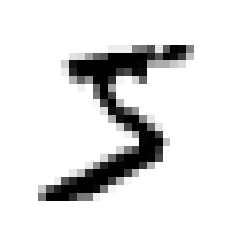

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [7]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)

In [9]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [10]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

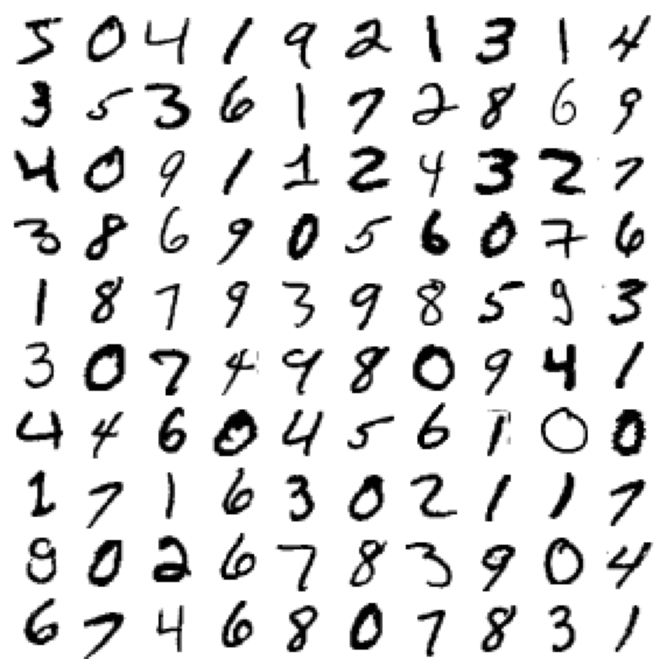

In [11]:
# plot first 100 digits. 

plt.figure(figsize=(12,12))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
# scale the input
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #center the distribution around zero (mean), with a standard deviation of 1.
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree v.s. Random Forest

Compare the performance of the decision tree and the random forest classifier with the mnist dataset. Print  `classification_report` and `confusion_matrix`

### Tuning parameters

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Use `GridSearchCV` to tune the  `n_estimators` and `max_features` of our Random Forest classifier. 